<a href="https://colab.research.google.com/github/arkajyotimitra/mini_projects/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
# print(np.random.randn(10,2))

In [ ]:

df = pd.read_csv('toy.txt', sep=',')
df

,x1,x2,label
0,0.89,-1.12,0
1,0.12,0.10,0
2,1.12,-0.24,0
3,0.10,0.63,0
4,-0.95,-0.67,1
5,1.00,1.73,0
6,-1.45,0.99,1
7,2.24,-0.21,0
8,-0.57,-2.57,1
9,-0.90,1.20,1


In [ ]:
df['x1']

0     0.89
1     0.12
2     1.12
3     0.10
4    -0.95
5     1.00
6    -1.45
7     2.24
8    -0.57
9    -0.90
10   -0.47
11   -0.40
Name: x1, dtype: float64

In [ ]:
x_train = df[['x1', 'x2']].values
y_train = df["label"].values

In [ ]:
x_train.shape

(12, 2)

In [ ]:
y_train.shape

(12,)

In [ ]:
np.bincount(y_train)

array([6, 6])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

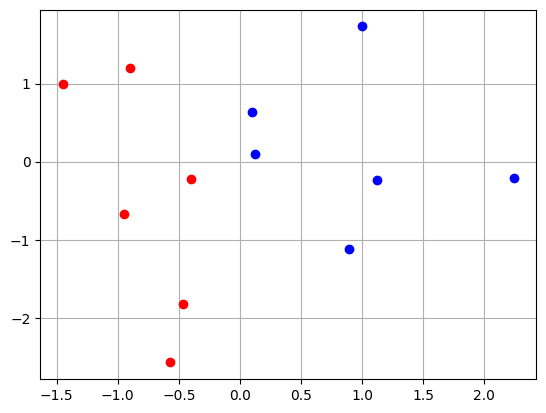

In [ ]:
plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'ro')
plt.grid()
plt.show()

In [ ]:
class Perceptron:
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = [0.0 for _ in range(self.num_features)]
    self.bias = 0.0

  def forward(self, x):
    weighted_sum = self.bias
    for i in range(self.num_features):
      weighted_sum += self.weights[i]*x[i]
    return 1 if weighted_sum > 0.0 else 0

  def update(self, x, true_y):
    prediction = self.forward(x)
    error = true_y - prediction

    self.bias += error
    for i, _ in enumerate(self.weights):
      self.weights[i] += error * x[i]

    return error


In [ ]:
ppn = Perceptron(num_features=2)

In [ ]:
ppn.bias, ppn.weights

(0.0, [0.0, 0.0])

In [ ]:
ppn.forward([1.1,1.2])

0

In [ ]:
ppn.update([1.1,1.2], 1)

1

In [ ]:
def train(model, x_train, y_train, epochs):
  for epoch in range(epochs):
    error_count = 0
    for x,y in zip(x_train, y_train):
      error = model.update(x,y)
      error_count += abs(error)
    print(f'epoch:{epoch + 1} error: {error_count}')

In [ ]:
ppn = Perceptron(num_features=2)
train(model = ppn, x_train=x_train, y_train=y_train, epochs=5)

epoch:1 error: 1
epoch:2 error: 3
epoch:3 error: 0
epoch:4 error: 0
epoch:5 error: 0


In [ ]:
def compute_acc(model, x_train, y_train):
  correct = 0.0
  for x, y in zip(x_train, y_train):
    prediction = model.forward(x)
    correct += int(prediction == y)
  return correct/len(y_train)

In [ ]:
compute_acc(ppn, x_train, y_train)

1.0

In [ ]:
def plot_boundary(model):
  w1, w2 = model.weights
  bias = model.bias

  x1_min = -20
  x2_min = (-w1*x1_min - bias)/w2
  x1_max = 20
  x2_max = (-w1*x1_max - bias)/w2

  return x1_min, x1_max, x2_min, x2_max

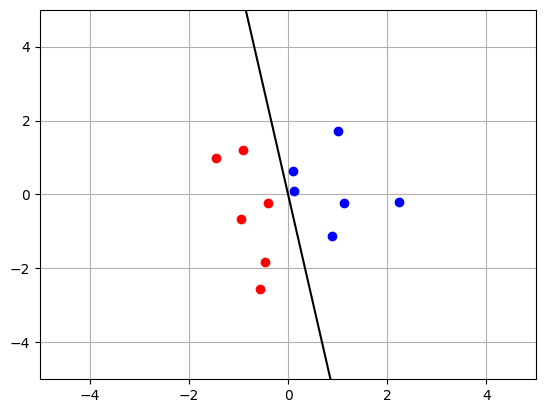

In [ ]:
plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'ro')
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)
plt.plot([x1_min, x1_max], [x2_min, x2_max], 'k')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid()
plt.show()

In [ ]:
import torch
x = torch.tensor([1.2, 5.1, -4.6])
y = torch.tensor([-2.1, 3.1, 5.5])

torch.matmul(x,y)
x.dot(y)

tensor(-12.0100)

In [ ]:
A = torch.tensor([[1, 2], [3, 4]])



B = torch.tensor([[5, 6], [7, 8]])

torch.matmul(A, B)

tensor([[19, 22],
        [43, 50]])

In [9]:
import torch

def activation(x):
  return 1 / (1 + torch.exp(-x))

def loss_func(activation_output, true_y):
  loss = torch.mean(true_y * torch.log(activation_output) + (1 - true_y)*torch.log(1 - activation_output))
  return loss

epoch = 10
true_y = torch.tensor([1.0])
x = torch.tensor([3.0])
w = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([0.], requires_grad=True)

u = w*x + b

activation_output = activation(u)
loss = loss_func(activation_output, true_y)

In [10]:
activation_output, loss

(tensor([0.9526], grad_fn=<MulBackward0>),
 tensor(-0.0486, grad_fn=<MeanBackward0>))

In [11]:
from torch.autograd import grad

gradient_w = grad(loss, w, retain_graph=True)
gradient_b = grad(loss, b, retain_graph=True)

In [13]:
gradient_w

(tensor([0.1423]),)

In [14]:
loss.backward() # calculates all the partial derivates involved in the loss calculation and retains the graph as well

In [15]:
w.grad, b.grad

(tensor([0.1423]), tensor([0.0474]))

In [16]:
import torch

torch.manual_seed(1)

linear = torch.nn.Linear(in_features=2, out_features=1)
print(linear.weight)
print(linear.bias)

Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True)
Parameter containing:
tensor([-0.1371], requires_grad=True)


In [17]:
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
y = linear(x)
print(y)

tensor([[-0.3969],
        [-0.2924]], grad_fn=<AddmmBackward0>)


In [19]:

class logistics(torch.nn.Module):
  def __init__(self, num_features) -> None:
    super().__init__()
    self.linear = torch.nn.Linear(in_features=num_features, out_features=1)

  def forward(self, x):
    logits = self.linear(x)
    return torch.sigmoid(logits)

In [20]:
model = logistics(num_features=2)

x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
with torch.no_grad():
  y = model(x)
print(y)

tensor([[0.3600],
        [0.2239]])
